In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

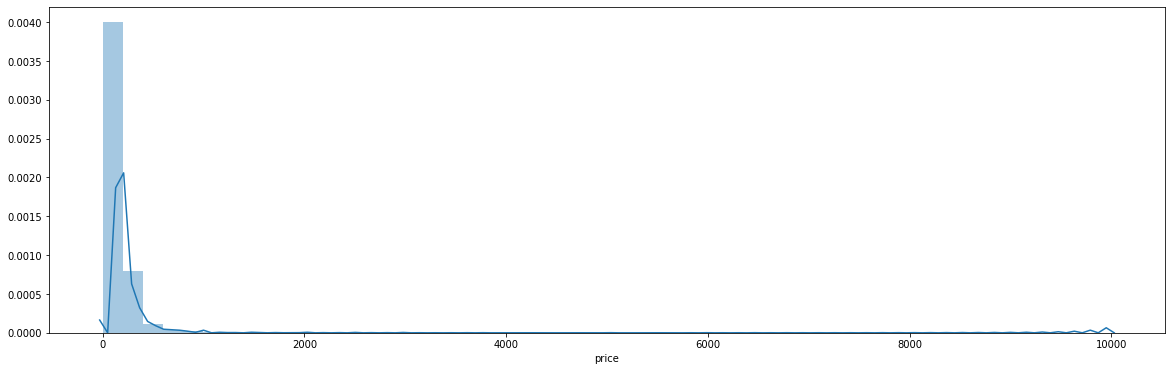

In [4]:
plt.figure(figsize=(20, 6))
sns.distplot(data.price)

In [5]:
print('Price 0: %d'%data.price[data.price == 0].count())
print('Price over 400: %d'%data.price[data.price > 400].count())

Price 0: 11
Price over 400: 1763


In [6]:
data = data.drop(data[data.price == 0].index, axis=0)
data = data.drop(data[data.price > 400].index, axis=0)

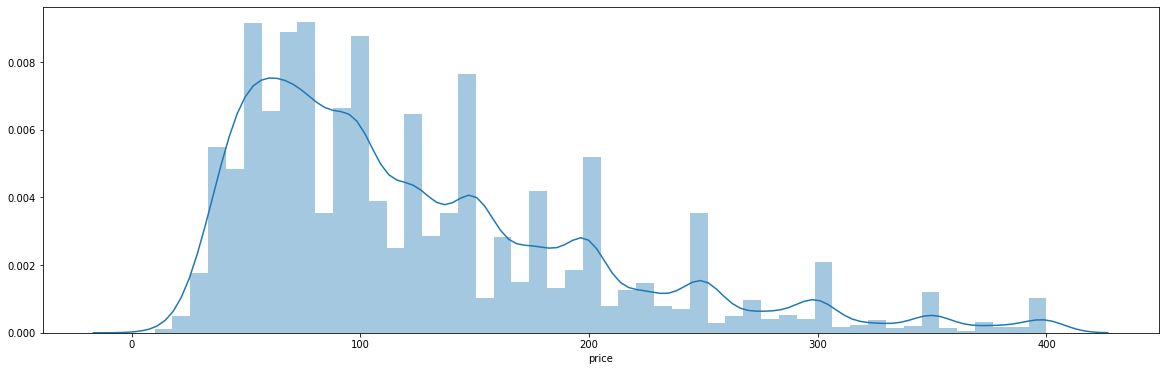

In [84]:
plt.figure(figsize=(20, 6))
sns.distplot(data.price)

In [7]:
data['price'].describe()

count    47121.000000
mean       126.434711
std         78.157460
min         10.000000
25%         67.000000
50%        100.000000
75%        165.000000
max        400.000000
Name: price, dtype: float64

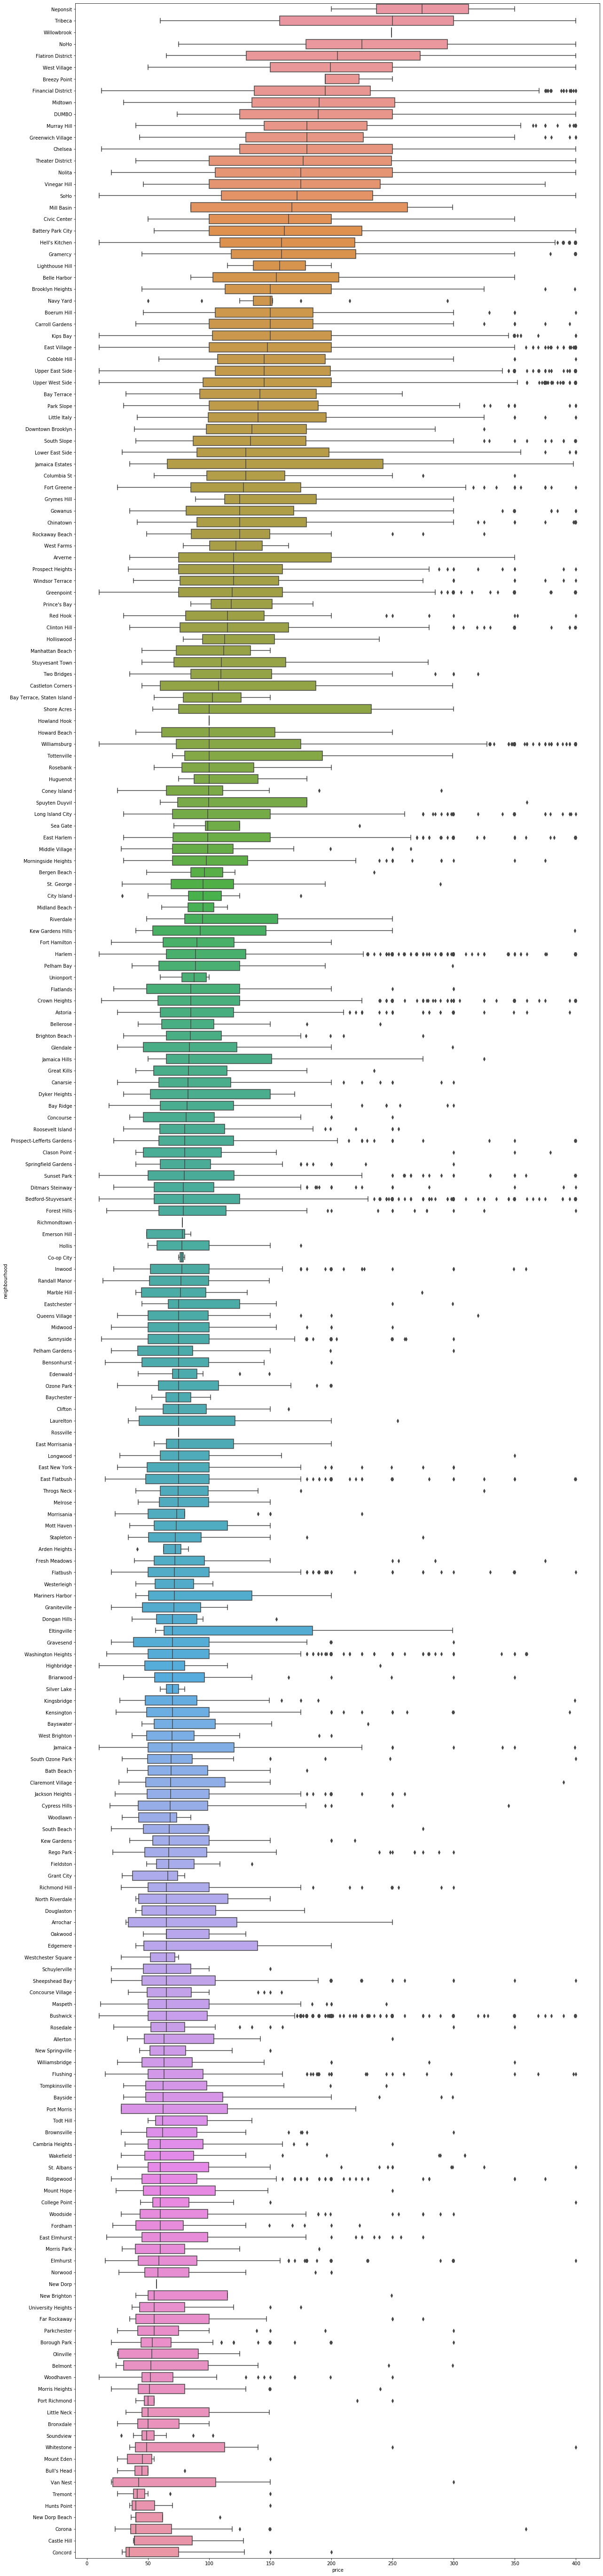

In [8]:
plt.figure(figsize=(20, 100))
# my_order = data.groupby(by=["neighbourhood"])["price"].mean().iloc[::-1].index
my_order = data.groupby(by=["neighbourhood"])["price"].median().sort_values(ascending = False).index
sns.boxplot(y=data['neighbourhood'], x=data['price'], order=my_order)

In [9]:
data['has_review'] = data['number_of_reviews'].where(data['number_of_reviews'] < 1, other=1)

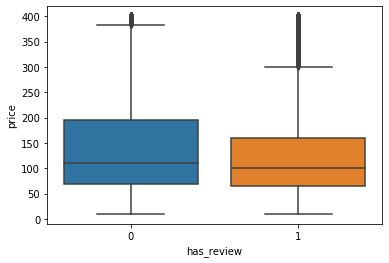

In [10]:
sns.boxplot(x='has_review', y='price', data=data)

In [3]:
drop_columns = ['id', 'name', 'host_id', 'host_name', 'number_of_reviews',
                'latitude', 'longitude', 'last_review', 'reviews_per_month', 'availability_365']
data = data.drop(drop_columns, axis=1)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
calculated_host_listings_count    48895 non-null int64
dtypes: int64(3), object(3)
memory usage: 2.2+ MB


In [7]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)


In [10]:
X_train['price'] = y_train
X_test['price'] = y_test


C:\Application\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Application\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
X_train.to_csv('airbnb_nyc_train.csv', index=False)
X_test.to_csv('airbnb_nyc_test.csv', index=False)

In [13]:
train = data.drop(['price'], axis=1)

In [14]:
train

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,calculated_host_listings_count
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,6
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,2
2,Manhattan,Harlem,40.80902,-73.94190,Private room,3,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,1
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,1
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,45,1
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,2,1
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,2,1
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,1,4
